In [1]:
import pickle

import humanize
import numpy as np
import pandas as pd
from datetime import datetime

%matplotlib inline
%load_ext autoreload

In [2]:
final_features = pd.read_csv('./final_features.csv', header=0, index_col=0)
outcomes = pd.read_csv('./labels.csv', header=None, index_col=0)[1]

In [3]:
col_names = np.append(final_features.columns.values, 'outcome')
col_names

array(['driver_age_raw', 'search_conducted', 'contraband_found', 'is_male',
       'violation_cell_phone', 'violation_display_of_plates',
       'violation_equipment', 'violation_incomplete_stop',
       'violation_license', 'violation_lights',
       'violation_moving_violation', 'violation_other',
       'violation_registration', 'violation_safe_movement',
       'violation_seatbelt', 'violation_speeding',
       'violation_suspended_license', 'violation_traffic_control_signal',
       'violation_window_tint', 'county_name_Fairfield County',
       'county_name_Hartford County', 'county_name_Litchfield County',
       'county_name_Middlesex County', 'county_name_New Haven County',
       'county_name_New London County', 'county_name_Tolland County',
       'county_name_Windham County', 'driver_race_Asian',
       'driver_race_Black', 'driver_race_Hispanic', 'driver_race_Other',
       'driver_race_White', 'stop_duration_1-15 min',
       'stop_duration_16-30 min', 'stop_duration_30+ 

In [4]:
final_features['outcomes'] = outcomes
final_features

,driver_age_raw,search_conducted,contraband_found,is_male,violation_cell_phone,violation_display_of_plates,violation_equipment,violation_incomplete_stop,violation_license,violation_lights,...,stop_duration_30+ min,day_period_Afternoon,day_period_Evening,day_period_Morning,day_period_Small Hours,season_Fall,season_Spring,season_Summer,season_Winter,outcomes
0,0.696970,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,Ticket
1,0.202020,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,Verbal Warning
2,0.343434,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,Ticket
3,0.464646,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,Written Warning
4,0.303030,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,Ticket
5,0.252525,0,0,1,0,0,0,0,0,1,...,0,0,0,0,1,1,0,0,0,Verbal Warning
6,0.272727,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,Ticket
7,0.484848,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,Verbal Warning
8,0.252525,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,Ticket
9,0.323232,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,Verbal Warning


In [5]:
final_features.shape

(313274, 44)

In [7]:
dropped_rows = final_features.drop_duplicates()
dropped_rows.to_csv('./oversampled_deduped/dropped_dupe-rows.csv')

In [11]:
final_features.groupby(list(final_features.columns.values)).size()

driver_age_raw  search_conducted  contraband_found  is_male  violation_cell_phone  violation_display_of_plates  violation_equipment  violation_incomplete_stop  violation_license  violation_lights  violation_moving_violation  violation_other  violation_registration  violation_safe_movement  violation_seatbelt  violation_speeding  violation_suspended_license  violation_traffic_control_signal  violation_window_tint  county_name_Fairfield County  county_name_Hartford County  county_name_Litchfield County  county_name_Middlesex County  county_name_New Haven County  county_name_New London County  county_name_Tolland County  county_name_Windham County  driver_race_Asian  driver_race_Black  driver_race_Hispanic  driver_race_Other  driver_race_White  stop_duration_1-15 min  stop_duration_16-30 min  stop_duration_30+ min  day_period_Afternoon  day_period_Evening  day_period_Morning  day_period_Small Hours  season_Fall  season_Spring  season_Summer  season_Winter  outcomes       
0.000000        

In [22]:
ff_dupes = final_features.duplicated()
ff_dupes[ff_dupes == True].index

Int64Index([   147,    176,    194,    220,    233,    445,    557,    633,
               647,    681,
            ...
            318651, 318652, 318653, 318654, 318657, 318659, 318660, 318662,
            318664, 318668],
           dtype='int64', length=127576)

In [6]:
final_features.drop_duplicates(inplace=True)

In [7]:
final_features.shape

(185698, 44)

In [8]:
arrest = final_features.loc[final_features['outcomes'] == 'Arrest']
summons = final_features.loc[final_features['outcomes'] == 'Summons']
ww = final_features.loc[final_features['outcomes'] == 'Written Warning']
vw = final_features.loc[final_features['outcomes'] == 'Verbal Warning']

In [9]:
oversampled = final_features.append([arrest] * 14, ignore_index=True)
oversampled = oversampled.append([summons] * 8, ignore_index=True)
oversampled = oversampled.append([ww] * 4, ignore_index=True)
oversampled = oversampled.append([vw] * 2, ignore_index=True)
oversampled.shape

(542994, 44)

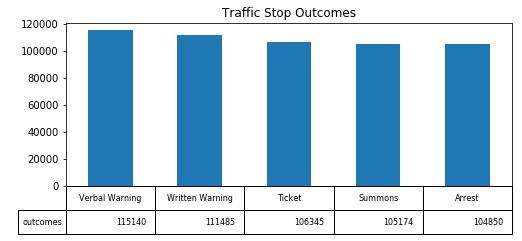

In [10]:
outcome_breakdown = oversampled['outcomes'].value_counts().plot.bar(figsize=(8, 3), title='Traffic Stop Outcomes', table=True)
outcome_breakdown.axes.get_xaxis().set_visible(False)
outcome_breakdown.tables[0].scale(1, 2)

In [11]:
oversampled_outcomes = oversampled.pop('outcomes')

In [12]:
oversampled_outcomes[:10]

0             Ticket
1     Verbal Warning
2             Ticket
3    Written Warning
4             Ticket
5     Verbal Warning
6             Ticket
7     Verbal Warning
8             Ticket
9     Verbal Warning
Name: outcomes, dtype: object

In [13]:
oversampled[:10]

,driver_age_raw,search_conducted,contraband_found,is_male,violation_cell_phone,violation_display_of_plates,violation_equipment,violation_incomplete_stop,violation_license,violation_lights,...,stop_duration_16-30 min,stop_duration_30+ min,day_period_Afternoon,day_period_Evening,day_period_Morning,day_period_Small Hours,season_Fall,season_Spring,season_Summer,season_Winter
0,0.696970,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
1,0.202020,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
2,0.343434,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
3,0.464646,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
4,0.303030,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
5,0.252525,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,1,1,0,0,0
6,0.272727,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
7,0.484848,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
8,0.252525,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
9,0.323232,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0


In [14]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
encoded_outcomes = le.fit_transform(oversampled_outcomes)


In [15]:
# from sklearn.cross_validation import train_test_split

# # Split the 'features' and 'income' data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(oversampled, 
#                                                     oversampled_outcomes, 
#                                                     test_size=0.2, 
#                                                     random_state=0)


In [16]:
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
import matplotlib
# matplotlib.use('Agg')
from matplotlib import pyplot


/home/pato/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/home/pato/anaconda2/envs/py36/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/home/pato/anaconda2/envs/py36/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/home/pato/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/pato/anaconda2/envs/py36/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/pato/anaconda2/envs/py36/lib/python3.6/site-packag

In [44]:
xg_train = xgb.DMatrix(oversampled, label=encoded_outcomes)
# xg_test = xgb.DMatrix(X_test.values, label=y_test.apply(labels_to_ints).values)

xgb_params = {
    'nthread': 8,
    'objective': 'multi:softmax',
    'learning_rate': .0983,
    'silent': 0,
    'tree_method': 'gpu_hist',
    'subsample': 0.6,
    'num_class': 43,
}

model = XGBClassifier(xgb_params)
# num_rounds = 3
# model = xgb.train(xgb_params, xg_train, num_rounds)

# n_estimators = [500, 1500, 2500]
# max_depth = [5, 12, 19]
n_estimators = [5, 10]
max_depth = [2]

param_grid = {
    'n_estimators': n_estimators,
    'max_depth': max_depth,
}
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)

In [46]:
cvresult = xgb.cv(
    xgb_params,
    dtrain=xg_train,
    num_boost_round=100,
    nfold=5,
    stratified=True,
    metrics={'mlogloss'},
    early_stopping_rounds=50,
    seed=0,
    callbacks=[xgb.callback.print_evaluation(show_stdv=False), xgb.callback.early_stop(3)]
)


[0]	train-mlogloss:3.08828	test-mlogloss:3.08868
Multiple eval metrics have been passed: 'test-mlogloss' will be used for early stopping.

Will train until test-mlogloss hasn't improved in 3 rounds.
[1]	train-mlogloss:2.80203	test-mlogloss:2.80284
[2]	train-mlogloss:2.6	test-mlogloss:2.60102
[3]	train-mlogloss:2.44349	test-mlogloss:2.44471
[4]	train-mlogloss:2.31603	test-mlogloss:2.31744
[5]	train-mlogloss:2.2096	test-mlogloss:2.21116
[6]	train-mlogloss:2.11845	test-mlogloss:2.12016
[7]	train-mlogloss:2.03935	test-mlogloss:2.04119
[8]	train-mlogloss:1.96986	test-mlogloss:1.97182
[9]	train-mlogloss:1.90845	test-mlogloss:1.91053
[10]	train-mlogloss:1.85368	test-mlogloss:1.85585
[11]	train-mlogloss:1.80442	test-mlogloss:1.8067
[12]	train-mlogloss:1.76005	test-mlogloss:1.76246
[13]	train-mlogloss:1.71977	test-mlogloss:1.72231
[14]	train-mlogloss:1.68309	test-mlogloss:1.68574
[15]	train-mlogloss:1.64969	test-mlogloss:1.65245
[16]	train-mlogloss:1.61906	test-mlogloss:1.62192
[17]	train-mlogl

In [37]:
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_log_loss', n_jobs=6, cv=kfold, verbose=3)

In [ ]:
grid_result = grid_search.fit(oversampled, encoded_outcomes)

https://github.com/dmlc/xgboost/issues/2819

In [ ]:
print('Best: {} using {}'.format(grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print('{} ({}) with {}'.format(mean, stdev, param))
scores = np.array(means).reshape(len(max_depth), len(n_estimators))
for i, value in enumerate(max_depth):
    pyplot.plot(n_estimators, scores[i], label='depth: {}'.format(value))
pyplot.legend()
pyplot.xlabel('n_estimators')
pyplot.ylabel('log loss')

In [ ]:
codes = {
    'Ticket': 1,
    'Arrest': 2,
    'Summons': 3,
    'Verbal Warning': 4,
    'Written Warning': 5,
}

def labels_to_ints(label):
    return codes[label]

In [ ]:
# Lop off 10,000 training rows for final final testing
X_test_2 = X_train[:10000]
X_train = X_train[10000:]
y_test_2 = y_train[:10000]
y_train = y_train[10000:]

In [ ]:
xg_train = xgb.DMatrix(X_train.values, label=y_train.apply(labels_to_ints).values)
xg_test = xgb.DMatrix(X_test.values, label=y_test.apply(labels_to_ints).values)
xg_test_2 = xgb.DMatrix(X_test_2.values, label=y_test_2.apply(labels_to_ints).values)

In [ ]:
params = {
    'objective': 'multi:softmax',
    'learning_rate': .0983,
    'max_depth': 8,
    'silent': 0,
    'nthread': 8,
    'num_class': 43,
#     'predictor': 'gpu_predictor',
#     'max_bin': 512,
    'tree_method': 'gpu_hist',
#     'alpha': 0.8,
#     'gamma': 10.0,
    'subsample': 0.6,
#     'lambda': 0.9,,
#     'colsample_bytree': 0.9,
#     'colsample_bylevel': 0.3,
#     'scale_pos_weight': 0.1,
#     'updater': 'grow_histmaker,refresh,prune',
#     'grow_policy': 'lossguide',
#     'max_leaves': 20000,
#     'max_bin': 1024,
#     'base_score': 1.0,
#     'eval_metric': 'ndcg',
#     'max_delta_step': 8,
}

In [ ]:
watchlist = [(xg_train, 'train'), (xg_test, 'test')]
# num_round = 100
num_round = 5
bst = xgb.train(params, xg_train, num_round, watchlist)
pred = bst.predict(xg_test)

In [ ]:
from datetime import datetime

timestamp = datetime.now().strftime('%Y%m%d%H%M%S')

In [ ]:
np.savetxt('oversampled_deduped/pred-{}.txt'.format(timestamp), pred)

In [ ]:
error_rate = np.sum(pred != y_test.apply(labels_to_ints)) / y_test.shape[0]
print('Test error using softmax = {}'.format(error_rate))

## My own grid search

In [ ]:
params = {
    'objective': 'multi:softmax',
    'learning_rate': 0.0983,
    'max_depth': 19,
    'silent': 0,
    'nthread': 8,
    'num_class': 43,
#     'predictor': 'gpu_predictor',
#     'max_bin': 512,
    'tree_method': 'gpu_hist',
#     'alpha': 0.8,
#     'gamma': 10.0,
    'subsample': 0.9,
#     'lambda': 0.9,,
#     'colsample_bytree': 0.9,
#     'colsample_bylevel': 0.3,
#     'scale_pos_weight': 0.1,
#     'updater': 'grow_histmaker,refresh,prune',
#     'grow_policy': 'lossguide',
#     'max_leaves': 20000,
#     'max_bin': 1024,
#     'base_score': 1.0,
#     'eval_metric': 'ndcg',
#     'max_delta_step': 8,
}

In [ ]:
# max_depths = [19]
# num_classes = [43]
# subsamples = [0.9]
# learning_rates = [0.09825, 0.0983, 0.09835]

# Uncomment on first run
# best_params = {
#     'error_rate': 1,
#     'learning_rate': .03,
# }

# for learning_rate in learning_rates:
#     params['learning_rate'] = learning_rate
#     print('\nlearning_rate: {}'.format(learning_rate))
    # params['max_depth'] = depth
    # print('\nmax_depth: {}'.format(depth))
watchlist = [(xg_train, 'train'), (xg_test, 'test')]
# num_round = 100
num_round = 1000

bst = xgb.train(params, xg_train, num_round, watchlist)

In [ ]:
pred = bst.predict(xg_test)

In [ ]:
error_rate = np.sum(pred != y_test.apply(labels_to_ints)) / y_test.shape[0]
print('Test error using softmax = {}'.format(error_rate))
# if error_rate < best_params['error_rate']:
#     best_params['error_rate'] = error_rate
#     best_params['learning_rate'] = learning_rate

# print('Best params:  {}'.format(best_params))

In [ ]:
pred_2 = bst.predict(xg_test_2)

In [ ]:
error_rate = np.sum(pred_2 != y_test_2.apply(labels_to_ints)) / y_test_2.shape[0]
print('Test error using softmax [test_2] = {}'.format(error_rate))

In [ ]:
from datetime import datetime

timestamp = datetime.now().strftime('%Y%m%d%H%M%S')

In [ ]:
bst.save_model('./oversampled_deduped/{}-xgb_model-1K-saved.model'.format(timestamp))

In [ ]:
bst.dump_model('./oversampled_deduped/{}-xgb_model-1K-dumped.txt'.format(timestamp))

In [ ]:
xg_train.save_binary('./oversampled_deduped/{}-xg_train.buffer'.format(timestamp))

In [ ]:
xg_test.save_binary('./oversampled_deduped/{}-xg_test.buffer'.format(timestamp))

In [ ]:
xg_test_2.save_binary('./oversampled_deduped/{}-xg_test_2.buffer'.format(timestamp))

In [ ]:
X_train.to_csv('./oversampled_deduped/{}-X_train.csv'.format(timestamp))

In [ ]:
y_train.to_csv('./oversampled_deduped/{}-y_train.csv'.format(timestamp))

### Reload model and resume training

In [ ]:
watchlist = [(xg_train, 'train'), (xg_test, 'test')]
loaded = xgb.Booster({'nthread': 8})
loaded.load_model('oversampled_deduped/xgb_model-1K-saved-20180505093413.model')
num_round = 1000

loaded = xgb.train(params, xg_train, num_round, watchlist, xgb_model=loaded)
pred_loaded = bst.predict(xg_test)
error_rate = np.sum(pred_loaded != y_test.apply(labels_to_ints)) / y_test.shape[0]
print('Test error using softmax = {}'.format(error_rate))

### xgboost.cv Test

In [ ]:
cvd = xgb.cv(params, xg_train, nfold=5)

In [ ]:
cvd

# RUN BELOW MANUALLY

## GridSearchCV

In [ ]:
from sklearn.cross_validation import *
from sklearn.grid_search import GridSearchCV
from sklearn.model_selection import StratifiedKFold

kwargs = {
    'tree_method': ['gpu_hist'],
}

xgb_model = xgb.XGBClassifier(kwargs)

parameters = {
    'objective': ['multi:softmax'],
    'learning_rate': [.05],
    'max_depth': [6, 7, 8],
#     'max_depth': [2],
    'silent': [0],
    'nthread': [7],
#     'n_estimators': [5],
    'n_estimators': [5],
#     'num_class': 43,
#     'predictor': ['gpu_predictor'],
#     'max_bin': 512,
#     'tree_method': ['gpu_hist'],
#     'alpha': 0.8,
#     'gamma': 10.0,
    'subsample': [0.6],
    'seed': [0],
#     'lambda': 0.9,,
#     'colsample_bytree': 0.9,
#     'colsample_bylevel': 0.3,
#     'scale_pos_weight': 0.1,
#     'updater': 'grow_histmaker,refresh,prune',
#     'grow_policy': 'lossguide',
#     'max_leaves': 20000,
#     'max_bin': 1024,
#     'base_score': 1.0,
#     'eval_metric': 'ndcg',
#     'max_delta_step': 8,
}

# clf = GridSearchCV(xgb_model, parameters, n_jobs=1, 
clf = GridSearchCV(xgb_model, parameters, n_jobs=5, 
#                    cv=StratifiedKFold(random_state=0, n_splits=5, shuffle=True), 
#                    cv=xgb.cv(parameters, xg_train, nfold=5),
                   scoring='accuracy',
                   verbose=2, refit=True)

In [ ]:
# xgb_model.get_params().keys()

In [ ]:
clf.fit(X_train.values, y_train.apply(labels_to_ints).values)

#trust your CV!
best_parameters, score, _ = max(clf.grid_scores_, key=lambda x: x[1])
print('Raw accuracy score:', score)
for param_name in sorted(best_parameters.keys()):
    print("%s: %r" % (param_name, best_parameters[param_name]))

In [ ]:
bst.save_model('oversampled_deduped/xgb_model-saved-{}.model'.format(timestamp))
bst.dump_model('oversampled_deduped/xgb_model_dumped-{}.txt'.format(timestamp))

In [ ]:
from sklearn.externals import joblib

joblib.dump(bst, "oversampled_deduped/xgb_model_{}.joblib.dat".format(timestamp))


In [ ]:
bst.save_model('./oversampled_deduped/xgb_model_test_001-saved.model')

In [ ]:
bst.dump_model('./oversampled_deduped/xgb_model_test_001-dumped.txt')

In [ ]:
ax = xgb.plot_importance(bst)
fig = ax.figure
fig.set_size_inches(15, 10)

In [ ]:
print('f0:\t{}'.format(col_names[0]))
print('f3:\t{}'.format(col_names[3]))
print('f30:\t{}'.format(col_names[30]))


In [ ]:
xgb.plot_tree(bst, num_trees=2)

In [ ]:
xgb.to_graphviz(bst, num_trees=2)

In [ ]:
import pickle

In [ ]:
from datetime import datetime

pickle.dump(bst, open('./xgb_model_5k.pickle.{}.dat'.format(datetime.now().strftime('%Y%m%d%H%M%S')), 'wb'))

### Plot results

In [ ]:
error_results = {
    'train': [],
    'test': [],
}

with open('oversampled_deduped/xgboost-1k_run-05052251.log', 'r') as f:
    for line in f:
        tokens = line.strip().split('\t')
        error_results['train'].append(float(tokens[1].split(':')[1]))
        error_results['test'].append(float(tokens[2].split(':')[1]))

df_errors = pd.DataFrame(error_results)

In [ ]:
learning_curve = df_errors.plot.line(title='Learning curve', figsize=(8,5))
learning_curve.set_xlabel('Number of runs')
learning_curve.set_ylabel('Error')


In [ ]:
type(error_results['test'])

In [ ]:
df_accuracy = df_errors.copy()
df_accuracy_processed = df_accuracy.mul(-1).add(1)

In [ ]:
learning_curve = df_accuracy_processed.plot.line(title='Learning curve', figsize=(8,5))
learning_curve.set_xlabel('Number of runs')
learning_curve.set_ylabel('Accuracy')


### Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix

labels = ['Ticket', 'Arrest', 'Summons', 'Verbal Warning', 'Written Warning']
cm = confusion_matrix(y_test_2.apply(labels_to_ints), pred_2)
pd.DataFrame(cm, columns=labels, index=labels)

In [ ]:
y_test_2.value_counts()

#### Precision, recall, and f- scores

In [ ]:
from sklearn.metrics import precision_recall_fscore_support

scores = {
    'micro': precision_recall_fscore_support(y_test_2.apply(labels_to_ints), pred_2, average='micro'),
    'macro': precision_recall_fscore_support(y_test_2.apply(labels_to_ints), pred_2, average='macro'),
    'weighted': precision_recall_fscore_support(y_test_2.apply(labels_to_ints), pred_2, average='weighted'),
}

df_scores = pd.DataFrame(scores, index=['precision', 'recall', 'fscore', 'support']).iloc[:3,:]
df_scores

# Load saved model and resume training

In [ ]:
# watchlist = [(xg_train, 'train'), (xg_test, 'test')]
# num_round = 1000

# loaded = pickle.load(open('./xgb_model_5k.pickle.dat', 'rb'))
# bst_continued = xgb.train(params, xg_train, num_round, watchlist, xgb_model=loaded)
# pred_continued = bst_continued.predict(xg_test)

In [ ]:
watchlist = [(xg_train, 'train'), (xg_test, 'test')]
# num_round = 5000
num_round = 50

loaded = xgb.Booster({'nthread': 8})
loaded.load_model('saved.model')
# loaded.load_model('xgb_model-saved-20180430174133.model')
# loaded.load_model('./xgb_model-dumped-20180430174133.model')
# loaded.load_model('./xgb_model_test_001-saved.model')

In [ ]:
bst_continued = xgb.train(params, xg_train, num_round, watchlist, xgb_model=loaded)
pred_continued = bst_continued.predict(xg_test)

In [ ]:
error_rate = np.sum(pred_continued != y_test.apply(labels_to_ints)) / y_test.shape[0]
print('Test error using softmax = {}'.format(error_rate))

In [ ]:
from datetime import datetime

timestamp = datetime.now().strftime('%Y%m%d%H%M%S')
bst_continued.save_model('./oversampled_deduped/xgb_model-1K-saved-{}.model'.format(timestamp))
bst_continued.dump_model('./oversampled_deduped/xgb_model-1K-dumped-{}.txt'.format(timestamp))